# Описание данных

In [2]:
%matplotlib inline
# %matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as rand 

Список данных из статьи:
1. сферы
* Swiss roll 
* moons
* s_curve
* Airfoils 
* MNIST
* iris dataset 
* diabetes dataset
* boston house-prices dataset 
* Olivetti faces data-set from AT&T
* California housing dataset 
* Labeled Faces in the Wild (LFW) people dataset

Методы: 
1. Левиной-Бикеля
* Isomap
* Гранаты

### 2-30D spheres 

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# generate shperes of different dimensions (from 2 to 30)
n, d_max = 1000, 30
d_sphere_data = []
for d in range(2,d_max+1):
    norm_x = rand.randn(n,d)
    sphere_data = pd.DataFrame(norm_x/np.sqrt(np.sum(norm_x**2, axis=1))[:,None])
    d_sphere_data.append(sphere_data)
print('Number of objects = ', n)
print('Number of features = 2-30')

# plot 3d sphere
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(norm_x[:,0],norm_x[:,1],norm_x[:,2])

Number of objects =  1000
Number of features = 2-30


### Swiss roll

Number of objects =  200
Number of features =  3


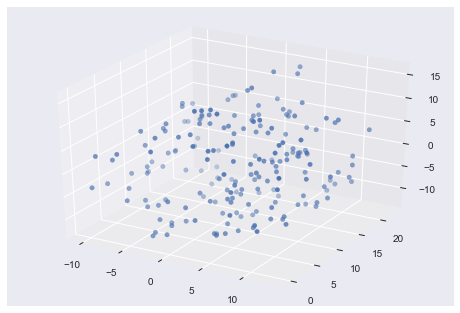

In [4]:
from sklearn.datasets import make_swiss_roll

# generate swiss roll and swiss roll with noise
n,noise = 200,1
swiss_roll_data = make_swiss_roll(n)[0]
swiss_roll_with_noise_data = make_swiss_roll(n, noise)[0]

# plot noise version of swiss roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(swiss_roll_with_noise_data[:,0],swiss_roll_with_noise_data[:,1],swiss_roll_with_noise_data[:,2])
swiss_roll_data = pd.DataFrame(swiss_roll_data)
swiss_roll_with_noise_data = pd.DataFrame(swiss_roll_with_noise_data)
print('Number of objects = ', n)
print('Number of features = ',swiss_roll_data.shape[1])

### Moons

Number of objects =  200
Number of features =  3


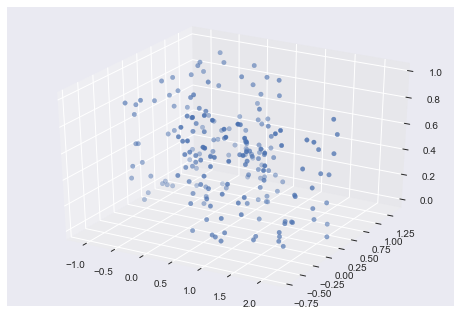

In [5]:
from sklearn.datasets import make_moons

# generate moons and moons with noise
n,noise = 200,0.1
moons_data = np.zeros((n,3))
moons_data[:,0:2] = make_moons(n)[0]
moons_data[:,2] = rand.uniform(0,1,200)

moons_with_noise_data = np.zeros((n,3))
moons_with_noise_data[:,0:2] = make_moons(n,noise=noise)[0]
moons_with_noise_data[:,2] = rand.uniform(0,1,200)

# plot noise version of moons
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(moons_with_noise_data[:,0],moons_with_noise_data[:,1],moons_with_noise_data[:,2])
moons_data = pd.DataFrame(moons_data)
moons_with_noise_data = pd.DataFrame(moons_with_noise_data)
print('Number of objects = ', n)
print('Number of features = ',moons_data.shape[1])

### S Curve

Number of objects =  200
Number of features =  3


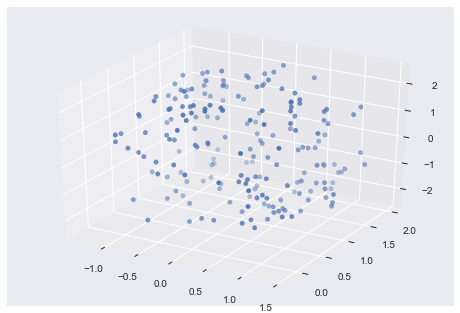

In [6]:
from sklearn.datasets import make_s_curve

# generate s curve and s curve with noise
n,noise = 200,0.2
s_curve_data = make_s_curve(n)[0]
s_curve_with_noise_data = make_s_curve(n,noise=noise)[0]

# plot noise version of s curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(s_curve_with_noise_data[:,0],s_curve_with_noise_data[:,1],s_curve_with_noise_data[:,2])
s_curve_data = pd.DataFrame(moons_data)
s_curve_with_noise_data = pd.DataFrame(moons_data)
print('Number of objects = ', n)
print('Number of features = ',s_curve_data.shape[1])

### Airfoils

In [7]:
airfoils_data = pd.read_csv('airfoils.csv')
print('Number of objects = ', airfoils_data.shape[0])
print('Number of features = ',airfoils_data.shape[1])

Number of objects =  198
Number of features =  59


### MNIST

In [8]:
mnist_data = pd.read_csv('train.csv')
small_mnist_data = mnist_data.groupby('label').head(100).reset_index(drop=True)
mnist_data = mnist_data.drop('label',axis = 1)
small_mnist_data
small_mnist_data = small_mnist_data.drop('label',axis = 1)
print('Number of objects = ', small_mnist_data.shape[0])
print('Number of features = ',small_mnist_data.shape[1])

Number of objects =  1000
Number of features =  784


### Iris dataset 

In [9]:
from sklearn.datasets import load_iris

iris_data = pd.DataFrame(load_iris().data)
print('Number of objects = ', iris_data.shape[0])
print('Number of features = ',iris_data.shape[1])

Number of objects =  150
Number of features =  4


### Diabetes dataset 

In [10]:
from sklearn.datasets import load_diabetes

diabetes_data = pd.DataFrame(load_diabetes().data)
print('Number of objects = ', diabetes_data.shape[0])
print('Number of features = ',diabetes_data.shape[1])

Number of objects =  442
Number of features =  10


### Boston house-prices dataset

In [11]:
from sklearn.datasets import load_boston

boston_data = pd.DataFrame(load_boston().data)
print('Number of objects = ', boston_data.shape[0])
print('Number of features = ',boston_data.shape[1])

Number of objects =  506
Number of features =  13


### Olivetti faces dataset

In [12]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_data = pd.DataFrame(fetch_olivetti_faces().data)
print('Number of objects = ', olivetti_data.shape[0])
print('Number of features = ',olivetti_data.shape[1])

Number of objects =  400
Number of features =  4096


### California housing dataset 

In [13]:
from sklearn.datasets import fetch_california_housing

california_data = pd.DataFrame(fetch_california_housing().data)
print('Number of objects = ', california_data.shape[0])
print('Number of features = ',california_data.shape[1])

Number of objects =  20640
Number of features =  8


### Labeled Faces in the Wild (LFW) people dataset

In [54]:
from sklearn.datasets import fetch_lfw_people

lfw_data = pd.DataFrame(fetch_lfw_people(resize = 0.5).data)
print('Number of objects = ', lfw_data.shape[0])
print('Number of features = ',lfw_data.shape[1])

Number of objects =  13233
Number of features =  2914


# Methods and Dimensionality Estimation Results

### Levina-Bickel Method
Original paper: [Levina E., Bickel P.J.: Maximum Likelihood Estimation of Intrinsic Dimension](https://www.stat.berkeley.edu/~bickel/mldim.pdf) 

#### Algorithm
Based on implementation: https://codegists.com/snippet/python/intdim_mlepy_mehdidc_python

In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [15]:
NearestNeighbors.kneighbors?

In [16]:
def intrinsic_dim_sample_wise(X, k=5, dist = None):
    """
    Returns Levina-Bickel dimensionality estimation
    
    Input parameters:
    X    - data
    k    - number of nearest neighbours (Default = 5)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    dimensionality estimation for the k 
    """
    if dist is None:
        neighb = NearestNeighbors(n_neighbors=k+1,algorithm='ball_tree').fit(X)
        dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:(k+1)]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k - 1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample


def intrinsic_dim_scale_interval(X, k1=10, k2=20, dist = None):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2, k1 < k2
    
    Input parameters:
    X    - data
    k1   - minimal number of nearest neighbours (Default = 10)
    k2   - maximal number of nearest neighbours (Default = 20)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    list of Levina-Bickel dimensionality estimation for k = k1..k2
    """
    intdim_k = []
#    if dist is None:
#        neighb = NearestNeighbors(n_neighbors=k+1,algorithm='ball_tree').fit(X)
#        dist, ind = neighb.kneighbors(X)
        
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k, dist).mean()
        intdim_k.append(m)
    return intdim_k


def bootstrap_intrinsic_dim_scale_interval(X, nb_iter=100, random_state=None, k1 = 10, k2 = 20, 
                                           average = True, plot_dependence = False, fig_name = "", title_add = ""):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2 (k1 < k2) averaged over bootstrap samples
    
    Input parameters:
    X            - data
    nb_iter      - number of bootstrap iterations (Default = 100)
    random_state - random state (Optional)
    k1           - minimal number of nearest neighbours (Default = 10)
    k2           - maximal number of nearest neighbours (Default = 20)
    average      - if False returns array of shape (nb_iter, k2-k1+1) of the estimations for each bootstrap samples (Default = True)
    
    Returns: 
    array of shape (k2-k1+1,) of Levina-Bickel dimensionality estimation for k = k1..k2 averaged over bootstrap samples
    """
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    X = pd.DataFrame(X.drop_duplicates().values)
    nb_examples = X.shape[0]
    results = []
    
    neighb = NearestNeighbors(n_neighbors=k2+1,algorithm='ball_tree').fit(X)
    dist, ind = neighb.kneighbors(X)    
    
    for i in range(nb_iter):
        idx = np.unique(rng.randint(0, nb_examples - 1, size=nb_examples))
        results.append(intrinsic_dim_scale_interval(X.iloc[idx], k1, k2, dist[idx,:]))
    results = np.array(results)
    if plot_dependence:
        dim_of_k = results.mean(axis = 0)
        levina_dimension = dim_of_k.mean()
        print('Dimension averanged over (k=',k1,'..',k2,') = ',levina_dimension)
        plt.plot(np.arange(k1,k2+1),dim_of_k)
        plt.xlabel('k - nearest neighbours')
        plt.ylabel('Dimension')
        if title_add == "":
            plt.title('Original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        else:
            plt.title(title_add + ', original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        if fig_name != "":
            plt.savefig(fig_name)
    if average:
        return results.mean(axis = 0)
    else:
        return results

#### Applying to spheres

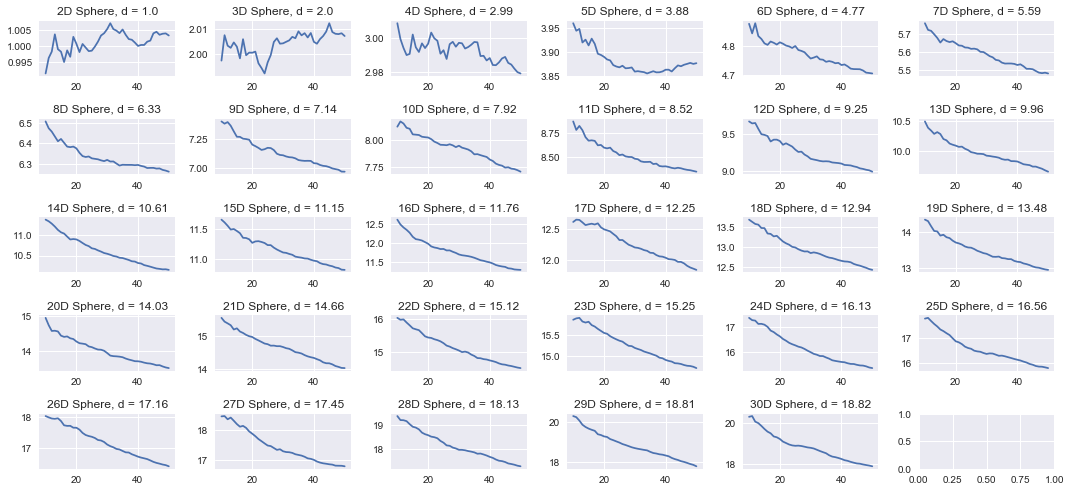

In [17]:
k1 = 10 # start of interval(included)
k2 = 50 # end of interval(included)
f, axarr = plt.subplots(5, 6,figsize=(15,7))
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dim_of_k = bootstrap_intrinsic_dim_scale_interval(d_sphere_data[i], nb_iter=50, k1=k1, k2=k2)
    levina_dimension = round(dim_of_k.mean(),2)
    
    # plot dependence of dimension estimation from k
    axarr[i//6,i%6].plot(np.arange(k1,k2+1),dim_of_k)
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere, d = '+str(levina_dimension))
f.tight_layout()
plt.savefig("pic1_1.pdf")

#### Applying to Swiss roll 

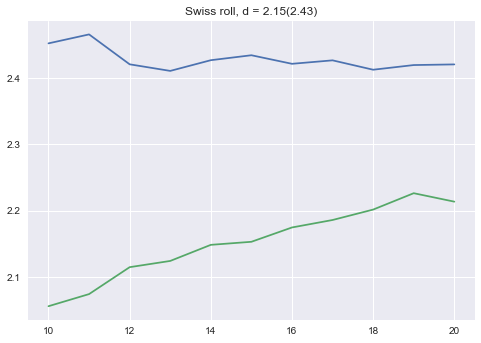

In [19]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)

noised_data = swiss_roll_with_noise_data
data = swiss_roll_data
name = 'Swiss roll'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(noised_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
noised_dim = levina_dimension
plt.plot(np.arange(k1, k2+1), dim_of_k)

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension)+"("+str(noised_dim)+")")
plt.show()

#### Applying to moons

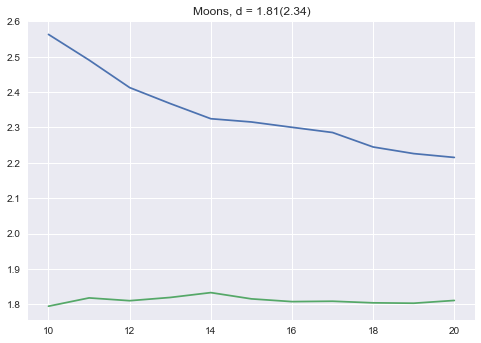

In [20]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)

noised_data = moons_with_noise_data
data = moons_data
name = 'Moons'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(noised_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
noised_dim = levina_dimension
plt.plot(np.arange(k1, k2+1), dim_of_k)

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension)+"("+str(noised_dim)+")")
plt.show()

#### Applying to s curve

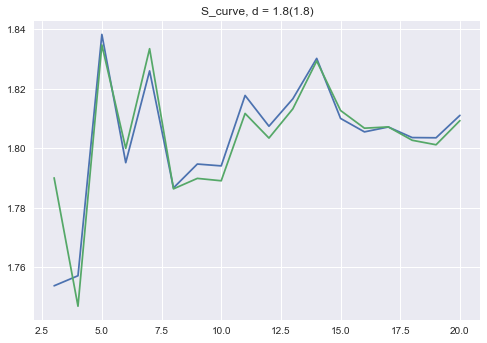

In [21]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 3 # start of interval(included)
k2 = 20 # end of interval(included)

noised_data = s_curve_with_noise_data
data = s_curve_data
name = 'S_curve'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(noised_data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
noised_dim = levina_dimension
plt.plot(np.arange(k1, k2+1), dim_of_k)

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension)+"("+str(noised_dim)+")")
plt.show()

#### Applying to Airfoils

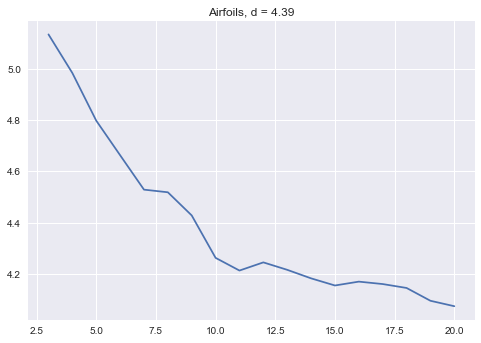

In [22]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)

data = airfoils_data
name = 'Airfoils'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to MNIST

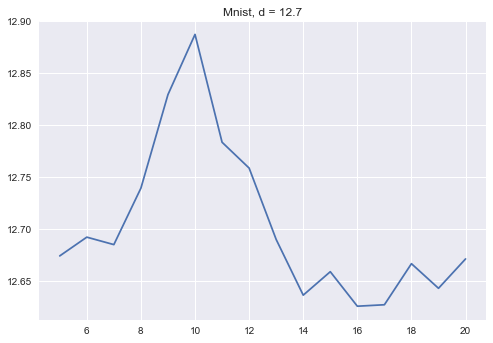

In [23]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 5,20 # start,end of interval(included)

data = small_mnist_data
name = 'Mnist'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to Iris

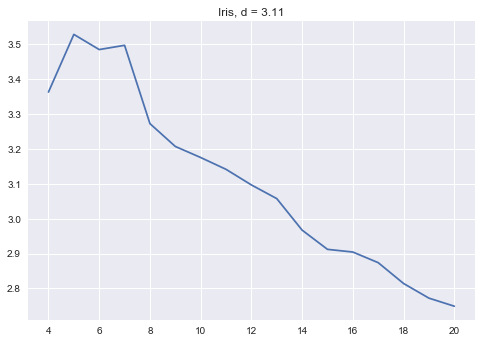

In [24]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 4,20 # start of interval(included)

data = iris_data
name = 'Iris'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to Diabetes

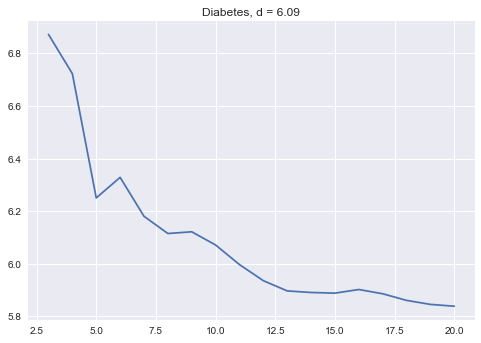

In [25]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)

data = diabetes_data
name = 'Diabetes'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to Boston house-prices dataset 

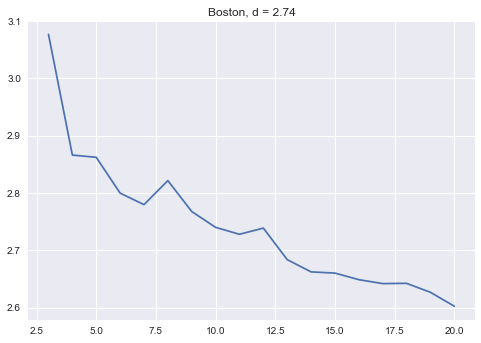

In [26]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)

data = boston_data
name = 'Boston'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to Olivetti faces data-set from AT&T

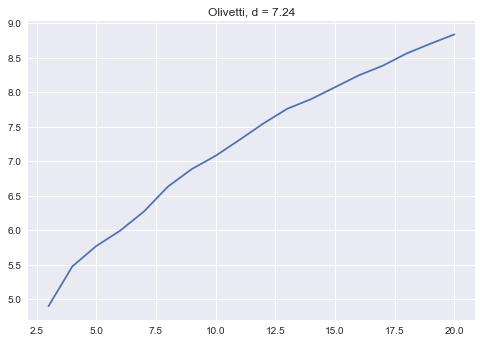

In [27]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)

data = olivetti_data
name = 'Olivetti'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to California housing dataset 

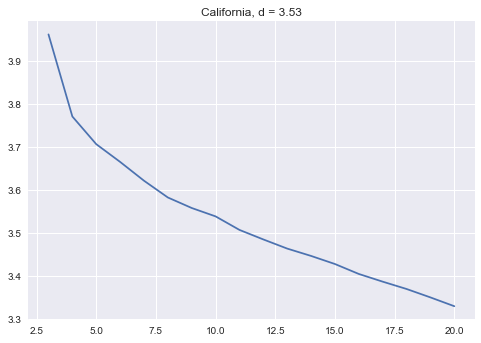

In [28]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start, end of interval(included)

data = california_data
name = 'California'

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

#### Applying to LFW

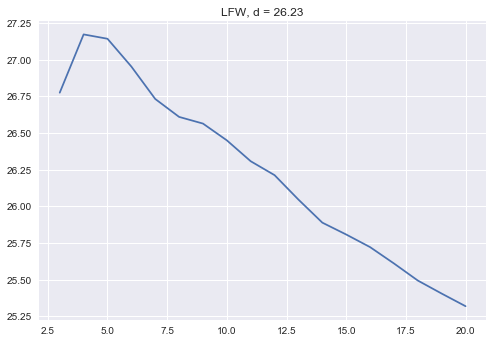

In [56]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)

name = 'LFW'
data = lfw_data

dim_of_k = bootstrap_intrinsic_dim_scale_interval(data, nb_iter=25, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(), 2)
plt.plot(np.arange(k1, k2+1), dim_of_k)

plt.title(name + ", d = " + str(levina_dimension))
plt.show()

### Isomap
Original paper: [Joshua B. Tenenbaum,Vin de Silva, John C. Langford: A Global Geometric Framework for Nonlinear Dimensionality Reduction](http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf)

#### Algorithm

In [57]:
from sklearn.manifold import Isomap
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [58]:
def compute_residual_variances_of_isomap(X,dims,n_neighbors = 5, plot_dependence = False, fig_name = "", title_add = ""):
    variances = []
    for m in dims:
        transformator = Isomap(n_components=m, n_neighbors=n_neighbors)
        transformator.fit(X)
        X_low = transformator.transform(X)
        D = squareform(pdist(X_low)).reshape(-1)
        D_fit = transformator.dist_matrix_.reshape(-1)
        variances.append(1 - np.corrcoef(D,D_fit)[0,1])
    if plot_dependence:
        plt.plot(dims, variances,'-^')
        plt.xlabel('dimensions')
        plt.ylabel('residual variance')
        if title_add != "":
            plt.title(title_add)
        if fig_name != "":
            plt.savefig(fig_name)
    return variances
        

#### Applying to Spheres

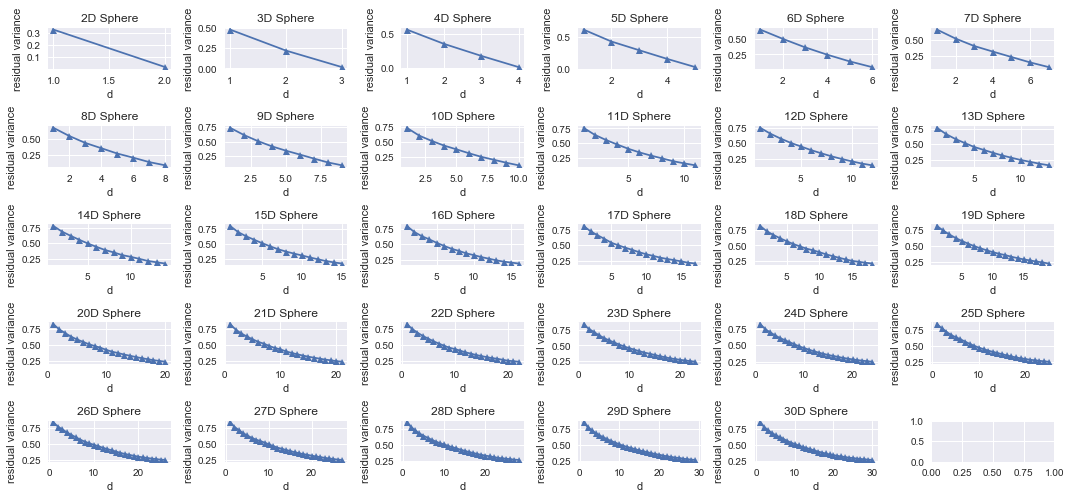

In [59]:
f, axarr = plt.subplots(5, 6,figsize=(15,7))
n_neighbors = 10
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dims = list(range(1,d_sphere_data[i].shape[1]+1))
    var_of_d = compute_residual_variances_of_isomap(d_sphere_data[i], dims, n_neighbors)
    
    # plot dependence of residual variance from dimension
    axarr[i//6,i%6].plot(dims,var_of_d,'-^')
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere')
    axarr[i//6,i%6].set_xlabel('d')
    axarr[i//6,i%6].set_ylabel('residual variance')
f.tight_layout()
plt.savefig("pic2_1.pdf")

#### Applying to Swiss roll

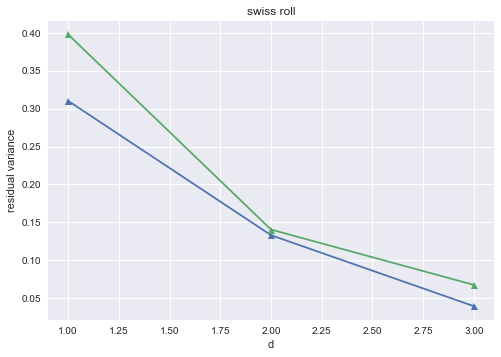

In [60]:
name = "swiss roll"
noise_data = swiss_roll_with_noise_data
data = swiss_roll_data

dims = list(range(1, noise_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(noise_data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to Moons

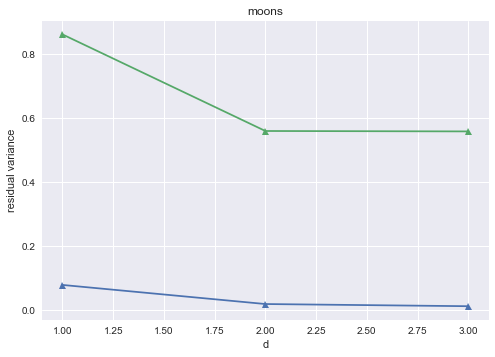

In [61]:
name = "moons"
noise_data = moons_with_noise_data
data = moons_data

dims = list(range(1, noise_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(noise_data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to S curve

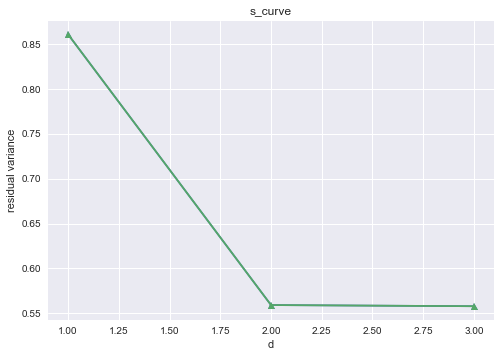

In [62]:
name = "s_curve"
noise_data = s_curve_with_noise_data
data = s_curve_data

dims = list(range(1, noise_data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(noise_data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Airfoils

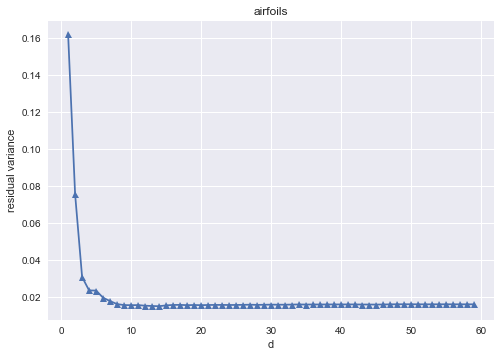

In [63]:
name = "airfoils"
data = airfoils_data

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to MNIST

D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value encountered in sqrt
  return np.dot(K, self.alphas_ / np.sqrt(self.lambdas_))
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value encountered in sqrt
  return np.dot(K, self.alphas_ / np.sqrt(self.lambdas_))
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value enco

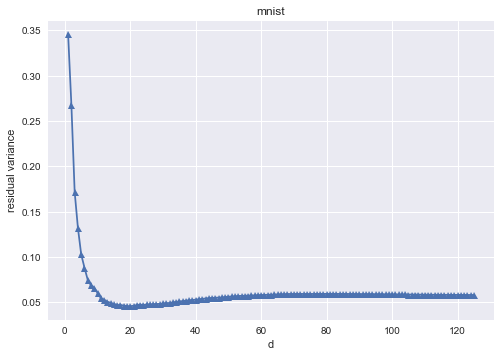

In [66]:
name = "mnist"
data = small_mnist_data[:250] # reduced due to long runtime

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    

# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to Iris

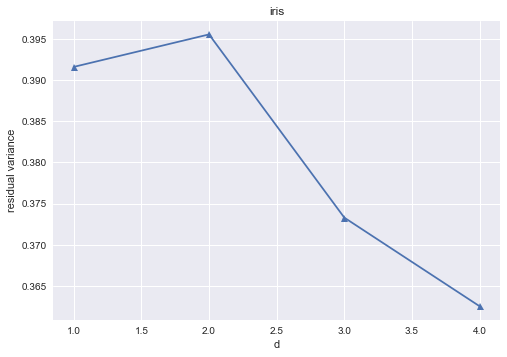

In [67]:
name = "iris"
data = iris_data

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to Diabetes dataset

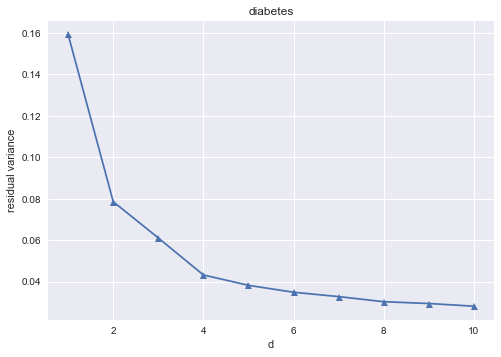

In [69]:
name = "diabetes"
data = diabetes_data

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to Boston house-prices dataset

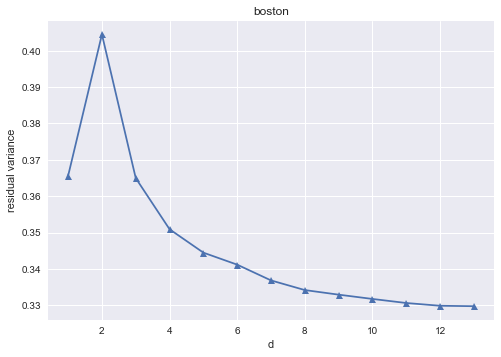

In [70]:
name = "boston"
data = boston_data

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to Olivetti faces data-set from AT&T

D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value encountered in sqrt
  return np.dot(K, self.alphas_ / np.sqrt(self.lambdas_))
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value encountered in sqrt
  return np.dot(K, self.alphas_ / np.sqrt(self.lambdas_))
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:262: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)
D:\Anaconda3\lib\site-packages\sklearn\decomposition\kernel_pca.py:283: RuntimeWarning: invalid value enco

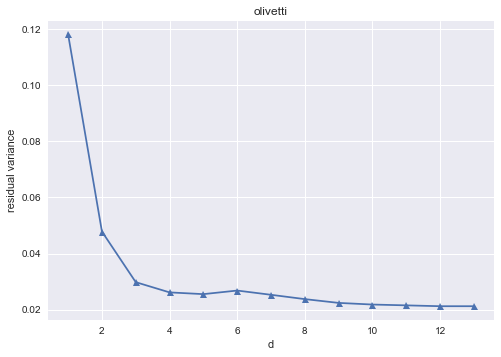

In [86]:
name = "olivetti"
data = olivetti_data[:20]

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to California housing dataset

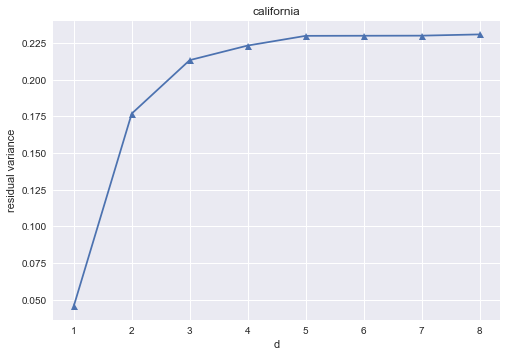

In [73]:
name = "california"
data = california_data[:10000]

dims = list(range(1,data.shape[1]+1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

#### Applying to LFW

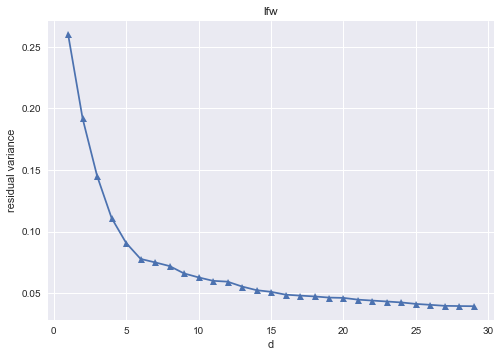

In [82]:
name = "lfw"
data = lfw_data[:100]   # reduced due to long runtime
size = 29

dims = list(range(1, size + 1))
var_of_d = compute_residual_variances_of_isomap(data, dims)    
#plot dependence of residual variance from dimension
plt.plot(dims,var_of_d[:size],'-^')

plt.title(name)
plt.xlabel('d')
plt.ylabel('residual variance')
plt.show()

### Granata-Carnevale method
Original paper: [Daniele Granata, Vincenzo Carnevale: Accurate Estimation of the Intrinsic Dimension Using Graph Distances: Unraveling the Geometric Complexity of Datasets](https://www.nature.com/articles/srep31377)

#### Algorithm
Implementation is based on: https://github.com/dgranata/Intrinsic-Dimension

Беда метода в том, что возможно придётся подгонять r_max по графику (второму), чтоб заработало и на 2d всё ломается.

In [4]:
import sys,argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.sparse import csr_matrix
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph
from sklearn.utils.graph import graph_shortest_path

In [5]:
def func(x,a,b,c):
    return a*np.log(np.sin(x/1*np.pi/2.))
         
def func2(x,a):
    return -a/2.*(x-1)**2

def func3(x,a,b,c):
    return np.exp(c)*np.sin(x/b*np.pi/2.)**a

def id_fit(X = None, me = 'euclidean', matrix = False, dist_mat = None, n_neighbors = 3, radius = 0,
           n_bins = 50, r_max = 0, r_min = -10, direct = False, projection = False, print_results = False, plot_results = False):
    """
	NOTE: it is important to have a smooth histogram for accurate fitting.
     
	 X 				- data, if you have no distance matrix
     metric 		- define the scipy distance to be used   (Default: euclidean or hamming for MSA)
     matrix 		- if you want your oun distances between all objects, set matrix to True and enter dist_mat (Default = False)
	 dist_mat		- square matrix of distances if matrix == True
     n_neighbors 	- nearest_neighbors parameter (Default k=3)
     radius 		- use neighbor radius instead of nearest_neighbors (Opt, Default = 0)
     n_bins 		- number of bins for distance histogram (Defaul = 50)
     r_max 			- fix the value of distance distribution maximum in the fit (Opt, Default = 0)
     r_min			- fix the value of shortest distance considered in the fit 
						(Opt, -1 force the standard fit, avoiding consistency checks, Default = -10)
     direct 		- analyze the direct (not graph) distances (Opt, Default = False)
     projection		- produce an Isomap projection using the first ID components (Opt, Default = False)
     print_results  - output results to console or not (Default = False)
     plot_results   - plot density estimation, log(r/r_max) vs log(p(r)/p(r_max)), root mean square deviation between 
                     the observed distribution and the one of a D-dimensional hypersphere as a function of D(RMSD) vs dimension
     
     returns:
     Dfit           - least square fit for p(r) = C(sin(r))^{D-1}
     Dmin           - argmin of RMSD
     """

    rmax = r_max
    MSA = False
    if me == 'hamming':
        MSA = True
    mm = -10000
    input_f = "results"

    data = X
    if matrix: me = 'as from the input file'

    if radius > 0.:
        filename = str(input_f.split('.')[0]) + 'R' + str(radius)
    else:
        filename = str(input_f.split('.')[0]) + 'K' + str(n_neighbors)
    # 0

    # 1 Computing geodesic distance on connected points of the input file and relative histogram
    if matrix:
        if data.shape[1] == 1:
            dist_mat = distance.squareform(data.ravel())
            mm = dist_mat.shape[1]
        elif data.shape[1] == 3:
            mm = int(max(data[:, 1]))
            dist_mat = np.zeros((mm, mm))
            for i in range(0, data.shape[0]):
                dist_mat[int(data[i, 0]) - 1, int(data[i, 1]) - 1] = data[i, 2]
                dist_mat[int(data[i, 1]) - 1, int(data[i, 0]) - 1] = data[i, 2]
        else:
            print('ERROR: The distances input is not in the right matrix format');  sys.exit(2)
        if print_results:
            print("\n# points: ", mm)

        A = np.zeros((mm, mm))
        rrr = []

        if direct: C = dist_mat
        if radius > 0.:
            for i in range(0, mm):
                ll = dist_mat[i] < radius
                A[i, ll] = dist_mat[i, ll]
        else:
            rrr = np.argsort(dist_mat)
            for i in range(0, mm):
                ll = rrr[i, 0:n_neighbors + 1]
                A[i, ll] = dist_mat[i, ll]
            radius = A.max()
        C = graph_shortest_path(A, directed=False)

    else:
        if direct:
            C = distance.squareform(distance.pdist(data, me));
        elif radius > 0.:
            A = radius_neighbors_graph(data, radius, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
        else:
            A = kneighbors_graph(data, n_neighbors, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
            radius = A.max()

    C = np.asmatrix(C)
    connect = np.zeros(C.shape[0])
    conn = np.zeros(C.shape[0])
    for i in range(0, C.shape[0]):
        conn_points = np.count_nonzero(C[i])
        conn[i] = conn_points
        if conn_points > C.shape[0] / 2.:
            connect[i] = 1
        else:
            C[i] = 0
    
    if np.count_nonzero(connect) > C.shape[0] / 2.:
        if print_results:
            print('Number of connected points:', np.count_nonzero(connect), '(', 100 * np.count_nonzero(connect) / C.shape[0],
                  '% )')
    else:
        print('The neighbors graph is highly disconnected, increase K or Radius parameters'); sys.exit(2)

    indices = np.nonzero(np.triu(C, 1))
    dist_list = np.asarray(C[indices])[-1]

    h = np.histogram(dist_list, n_bins)
    dx = h[1][1] - h[1][0]
    
    fig,ax = None,None
    if plot_results:
        fig,ax = plt.subplots(1,3,figsize=(15,5))
        ax[0].plot(h[1][0:n_bins] + dx / 2, h[0], 'o-', label='histogram')
        ax[0].set_xlabel('r')
        ax[0].set_ylabel('N. counts')
        ax[0].legend()
    distr_x = []
    distr_y = []

    avg = np.mean(dist_list)
    std = np.std(dist_list)

    if rmax > 0:
        avg = rmax
        if print_results:
            print('\nNOTE: You fixed r_max for the initial fitting, average will have the same value')
    else:
        mm = np.argmax(h[0])
        rmax = h[1][mm] + dx / 2

    if r_min >= 0:
        if print_results:
            print('\nNOTE: You fixed r_min for the initial fitting: r_min = ', r_min)
    if r_min == -1:
        if print_results:
            print('\nNOTE: You forced r_min to the standard procedure in the initial fitting')
    if print_results:
        print('\nDistances Statistics:')
        print('Average, standard dev., n_bin, bin_size, r_max, r_NN_max:', avg, std, n_bins, dx, rmax, radius, '\n')
    # 1
    tmp = 1000000
    if (r_min >= 0):
        tmp = r_min
    elif (r_min == -1):
        tmp = rmax - std

    if (np.fabs(rmax - avg) > std):
        print('ERROR: There is a problem with the r_max detection:')
        print(
        '       usually either the histogram is not smooth enough (you may consider changing the n_bins with option -b)')
        print(
        '       or r_max and r_avg are too distant and you may consider to fix the first detection of r_max with option -M')
        print('       or to change the neighbor parameter with (-r/-k)')
        plt.show()
        sys.exit()

    elif (rmax <= min(radius + dx, tmp)):
        print(
        'ERROR: There is a problem with the r_max detection, it is shorter than the largest distance in the neighbors graph.')
        print(
        '       You may consider to fix the first detection of r_max with option -M and/or the r_min with option -n to fix the fit range')
        print('       or to decrease the neighbors parameter with (-r/-k)')
        plt.show()
        sys.exit()

    # 2 Finding actual r_max and std. dev. to define fitting interval [rmin;rM]
    distr_x = h[1][0:n_bins] + dx / 2
    distr_y = h[0][0:n_bins]

    res = np.empty(25)
    left_distr_x = np.empty(n_bins)
    left_distr_y = np.empty(n_bins)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)]
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a0 = coeff[0][0]
    b0 = coeff[0][1]
    c0 = coeff[0][2]

    rmax = -b0 / a0 / 2.0
    if (r_max > 0): rmax = r_max
    std = np.sqrt(-1 / a0 / 2.)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)]
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a = coeff[0][0]
    b = coeff[0][1]
    c = coeff[0][2]

    rmax_old = rmax
    std_old = std
    rmax = -b / a / 2.
    std = np.sqrt(-1 / a / 2.)  # it was a0
    rmin = max(rmax - 2 * np.sqrt(-1 / a / 2.) - dx / 2, 0.)
    if (r_min >= 0):
        rmin = r_min
    elif (rmin < radius and r_min != -1):
        rmin = radius
        if print_results:
            print(
            '\nWARNING: For internal consistency r_min has been fixed to the largest distance (r_NN_max) in the neighbors graph.')
            print(
            '         It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
            print('         or you can use -n to manually define a desired value (Example: -n 0.1)\n')

    rM = rmax + dx / 4

    if (np.fabs(rmax - rmax_old) > std_old / 4):  # fit consistency check
        if print_results:
            print(
            '\nWARNING: The histogram is probably not smooth enough (you may try to change n_bin with -b), rmax is fixed to the value of first iteration\n')
            print(rmax,rmax_old,std/4,std_old/4)
        rmax = rmax_old
        a = a0
        b = b0
        c = c0
        if (r_min >= 0):
            rmin = r_min
        elif (rmin < radius and r_min != -1):
            rmin = radius
            if print_results:
                print(
                '\nWARNING2: For internal consistency r_min has been fixed to the largest distance in the neighbors graph (r_NN_max).')
                print(
                '          It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
                print('          or you can use -n to manually define a desired value (Example: -n 0.1)\n')
        rM = rmax + dx / 4
    # 2

    # 3 Gaussian Fitting to determine ratio R

    left_distr_x = distr_x[
                       np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)] / rmax
    left_distr_y = np.log(
        distr_y[np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)]) - (
                                                                                                             4 * a * c - b ** 2) / 4. / a

    fit = curve_fit(func2, left_distr_x, left_distr_y)
    ratio = np.sqrt(fit[0][0])
    y1 = func2(left_distr_x, fit[0][0])
    # 3

    # 4 Geodesics D-Hypersphere Distribution Fitting to determine Dfit

    fit = curve_fit(func, left_distr_x, left_distr_y)
    Dfit = (fit[0][0]) + 1

    y2 = func(left_distr_x, fit[0][0], fit[0][1], fit[0][2])
    # 4


    # 5 Determination of Dmin

#     D_file = open('D_residual_{0}.dat'.format(filename), "w")

    for D in range(1, 26):
        y = (func(left_distr_x, D - 1, 1, 0))
        for i in range(0, len(y)):
            res[D - 1] = np.linalg.norm((y) - (left_distr_y)) / np.sqrt(len(y))
#         D_file.write("%s " % D)
#         D_file.write("%s\n" % res[D - 1])

    Dmin = np.argmax(-res) + 1

    y = func(left_distr_x, Dmin - 1, fit[0][1], 0)
    # 5

    # 6 Printing results
    if print_results:
        print('\nFITTING PARAMETERS:')
        print('rmax, std. dev., rmin', rmax, std, rmin)
        print('\nFITTING RESULTS:')
        print('R, Dfit, Dmin', ratio, Dfit, Dmin, '\n')

    if plot_results:
        ax[1].plot(left_distr_x, left_distr_y, 'o-', label=str(input_f.split('.')[0]))
        ax[1].plot(left_distr_x, y1, label='Gaussian fit for R ratio')
        ax[1].plot(left_distr_x, y2, label='D-Hypersphere Fit for D_fit')
        ax[1].plot(left_distr_x, y, label='D_min-Hypersphere Distribution')
        ax[1].set_xlabel('r/r$_{max}$')
        ax[1].set_ylabel('log p(r)/p(r$_{max}$)')
        ax[1].legend(loc=4)
        
        ax[2].plot(range(1, 26), res, 'o-', label=str(input_f.split('.')[0]) + ' D_min')
        ax[2].legend()
        ax[2].set_xlabel('D')
        ax[2].set_ylabel('RMDS')
#         plt.show()
    #     plt.savefig(str(input_f.split('.')[0]) + '_Dmin.png')

    # 6

    # 7 Optional: Isomap projection
    if projection:
        from sklearn.decomposition import KernelPCA
        C2 = (distance.squareform(dist_list)) ** 2
        C2 = -.5 * C2
        obj_pj = KernelPCA(n_components=100, kernel="precomputed")
        proj = obj_pj.fit_transform(C2)
        np.savetxt('proj_' + str(input_f.split('.')[0]) + '.dat', proj[:, 0:Dmin])
    return Dfit,Dmin
#     print('NOTE: it is important to have a smooth histogram for accurate fitting\n')


#### Применение к сферам

In [90]:
spheres_dimensions = pd.DataFrame()
spheres_dimensions['Sphere dimension'] = list(range(2,len(d_sphere_data)+2))
spheres_dimensions['D_min'] = list(range(len(spheres_dimensions)))
spheres_dimensions['D_fit'] = np.round(np.linspace(0,1,len(spheres_dimensions)),2)
for i in range(1,len(d_sphere_data)):
    D_fit,D_min = id_fit(d_sphere_data[i],r_max = 1.5,n_neighbors=10,direct = True,plot_results=False)
    spheres_dimensions['D_min'][i] = D_min
    spheres_dimensions['D_fit'][i] = np.round(D_fit,2)
pd.options.display.max_columns = 30
spheres_dimensions.transpose()

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
Sphere dimension,2.0,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.0,11.0,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.0,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00
D_min,0.0,3.00,3.00,5.00,6.00,8.00,9.00,11.00,12.0,14.0,12.00,13.00,14.00,15.00,16.00,17.00,17.00,18.00,19.00,19.00,20.0,21.00,21.00,22.00,22.00,23.00,24.00,24.00,25.00
D_fit,0.0,2.88,3.43,4.82,6.27,7.65,9.08,10.71,12.0,13.6,12.29,13.22,13.99,14.96,15.53,16.57,17.33,18.03,18.54,19.46,20.3,20.88,21.13,22.28,22.43,23.14,24.01,24.38,24.92


#### Applying to Swiss roll

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


swiss roll with noise 
D_min: 2 
D_fit:  2.19515771918


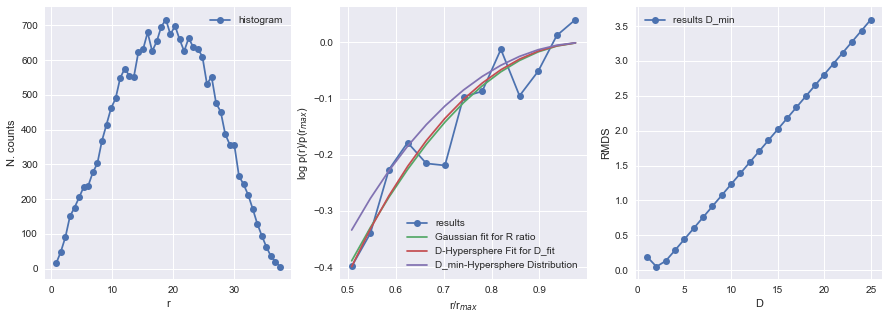

In [94]:
data = swiss_roll_with_noise_data
name = "Swiss roll"
D_fit,D_min = id_fit(data, n_neighbors=10, direct = False, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Moons

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Moons 
D_min: 2 
D_fit:  2.03015353508


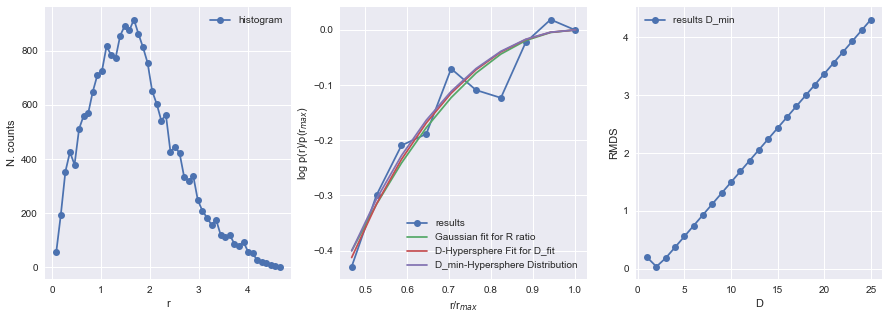

In [95]:
data = moons_with_noise_data
name = "Moons"
D_fit,D_min = id_fit(data, n_neighbors=10, direct = False, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to S curve

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


S_curve 
D_min: 1 
D_fit:  1.0812751677


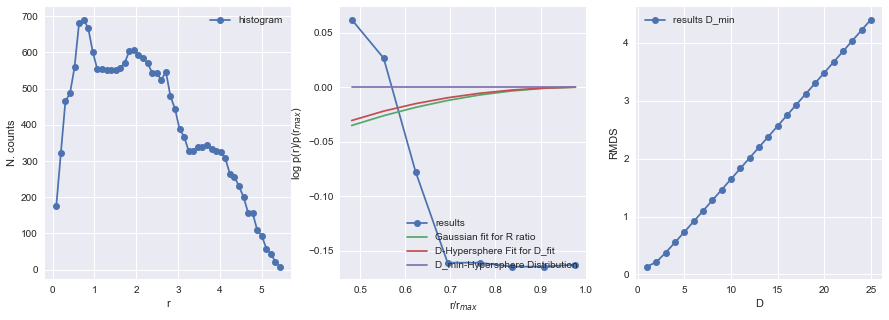

In [101]:
data = s_curve_with_noise_data
name = "S_curve"
D_fit,D_min = id_fit(data, r_max=1.5, n_neighbors=10, direct = False, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Применение к Airfoils

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Airfoils 
D_min: 4 
D_fit:  3.80402260751


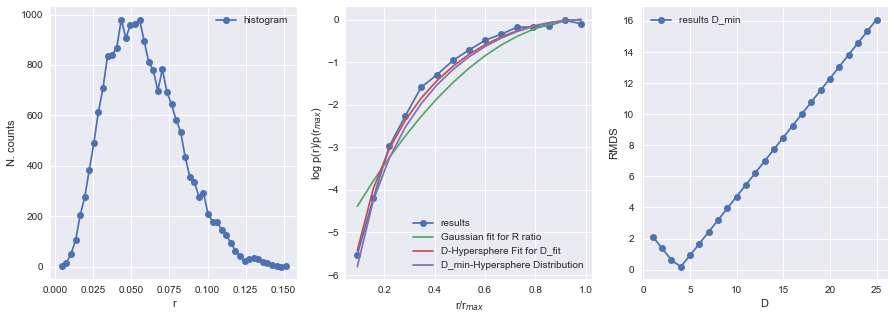

In [103]:
data = airfoils_data
name = "Airfoils"
D_fit,D_min = id_fit(data, n_neighbors=10, direct = True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Применение к MNIST

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Mnist 
D_min: 22 
D_fit:  21.6255542064


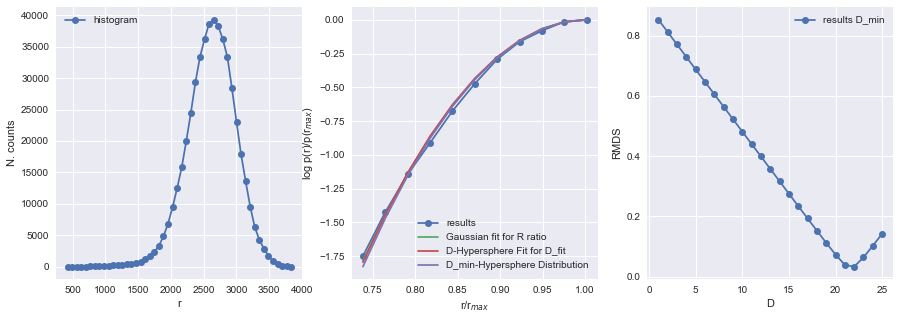

In [106]:
data = small_mnist_data
name = "Mnist"
D_fit,D_min = id_fit(data, n_neighbors=10, direct = True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Iris

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Iris 
D_min: 2 
D_fit:  1.61017692182


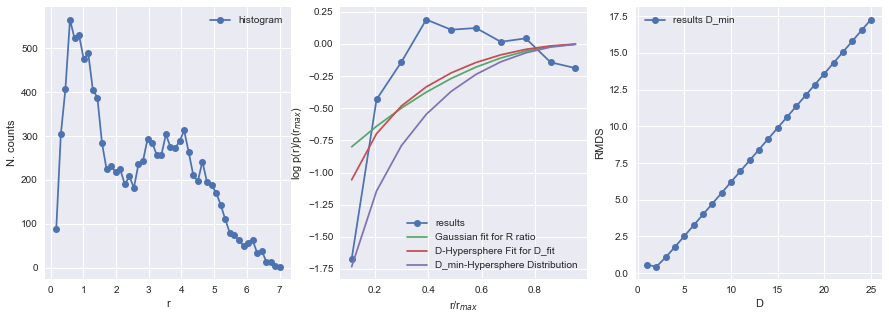

In [110]:
data = iris_data
name = "Iris"
D_fit,D_min = id_fit(data, r_max=1.5, n_neighbors=10, direct = True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Diabetes dataset

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Diabetes 
D_min: 7 
D_fit:  6.62604061134


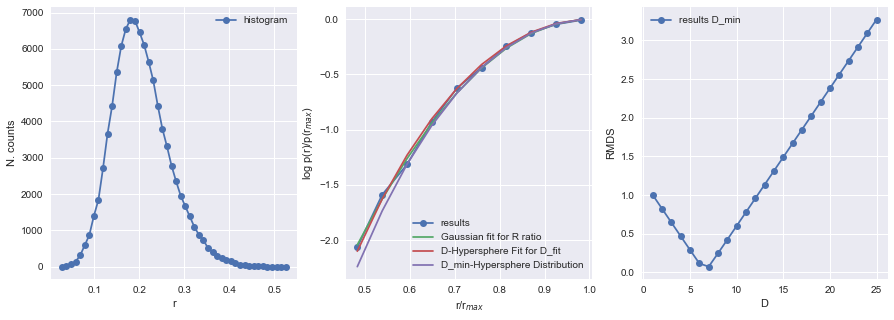

In [113]:
data = diabetes_data
name = "Diabetes"
D_fit,D_min = id_fit(data, n_neighbors=10, direct = True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Boston house-prices

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Boston 
D_min: 2 
D_fit:  1.77796256526


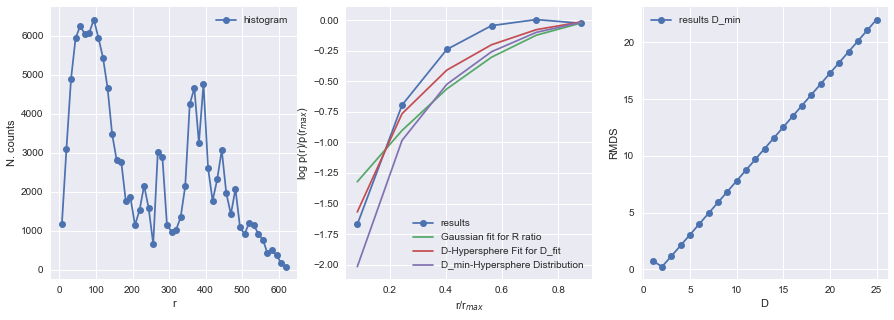

In [135]:
data = boston_data
name = "Boston"
D_fit,D_min = id_fit(data, n_neighbors=10, direct=True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Olivetti faces data-set from AT&T

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Olivetti 
D_min: 5 
D_fit:  5.36983100151


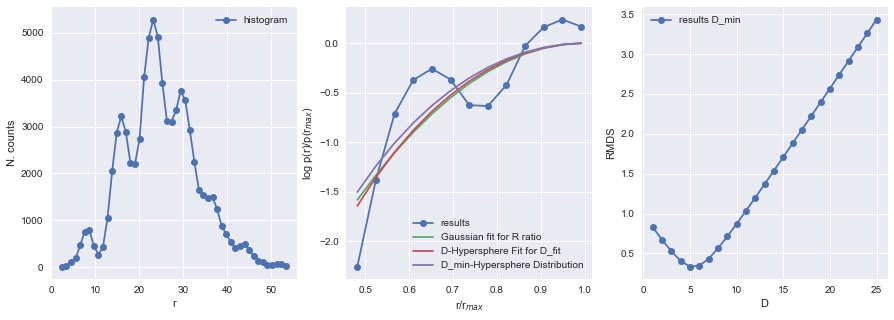

In [137]:
data = olivetti_data
name = "Olivetti"
D_fit,D_min = id_fit(data, n_neighbors=10, direct=False, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to California housing dataset

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


California 
D_min: 1 
D_fit:  1.4050171848


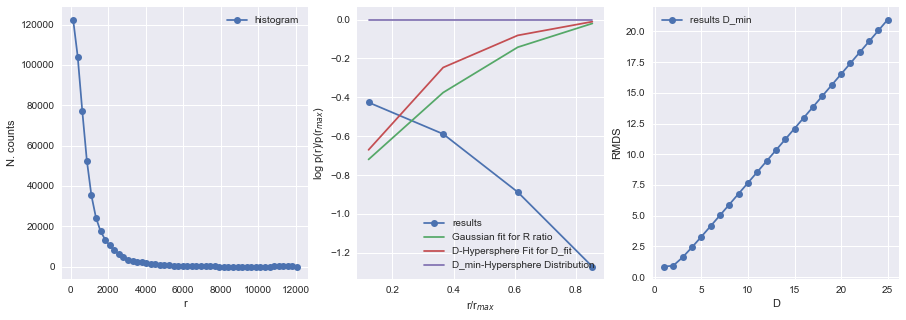

In [41]:
data = california_data[:1000]
name = "California"
D_fit,D_min = id_fit(data, r_max=1000, n_neighbors=10, direct=True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

#### Applying to Labeled Faces in the Wild (LFW) 

D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


LFW 
D_min: 14 
D_fit:  14.2150267743


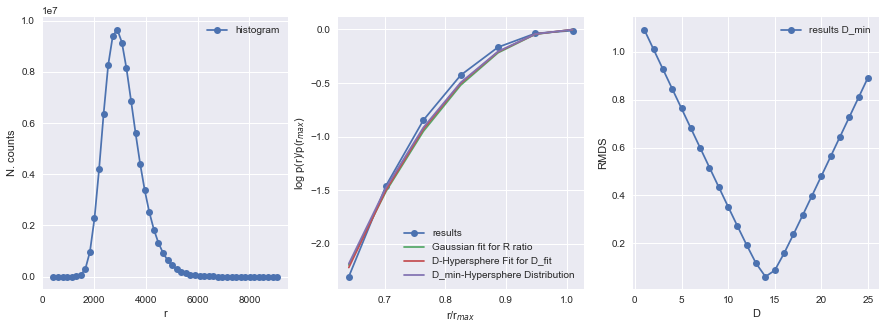

In [6]:
data = lfw_data
name = "LFW"
D_fit,D_min = id_fit(data, n_neighbors=10, direct=True, plot_results=True)
print(name, "\nD_min:", D_min, "\nD_fit: ", D_fit)

# Оценить размерность выборок с помощью PCA

In [48]:
def PCA_find_variances(data):
    data = data.values
    sample_size = len(data)
    sample_mean = np.average(data, axis=0)       # Data mean as list.
    centered_data = data - sample_mean
    sample_covariance = 1 / sample_size * np.dot(np.transpose(centered_data), centered_data) # Data covariance estimation as a 2x2 dimensional array.
    lambdas = np.linalg.eigh(sample_covariance)[0][::-1] # Variances along principal components in decreasing order
    return lambdas

def PCA_find_ID(data, plot_results=True):
    lambdas = PCA_find_variances(data)
    sample_dim = len(lambdas)
    cumsum = np.cumsum(lambdas)
    var_sum = np.sum(lambdas)
    if plot_results:
        plt.plot(range(1,sample_dim+1), cumsum / var_sum, "-*b")
        plt.plot(range(1,sample_dim+1), [1]*sample_dim, "r")
        plt.plot(range(1,sample_dim+1), [0.99]*sample_dim, "m")
        plt.plot(range(1,sample_dim+1), [0.95]*sample_dim, "g")
        plt.show()
    for i in range(sample_dim):
        if cumsum[i] / var_sum >= 0.9:  # Check how many variances we need to keep in order to keep 90% information
            return i + 1

# Applying to Spheres

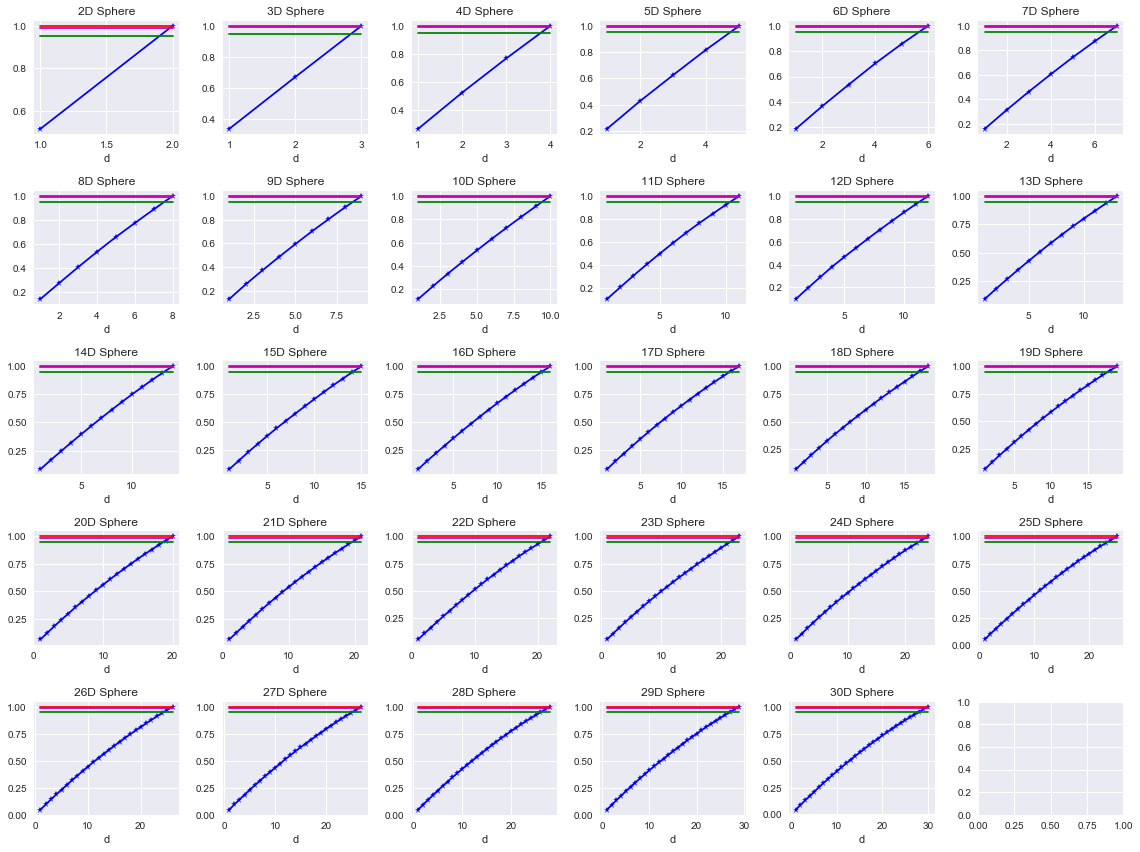

In [75]:
f, axarr = plt.subplots(5, 6,figsize=(16,12))

for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dims = list(range(1,d_sphere_data[i].shape[1]+1))
    lambdas = PCA_find_variances(d_sphere_data[i])
    residual_vars = np.cumsum(lambdas) / np.sum(lambdas)
    # plot dependence of residual variance from dimension
    axarr[i//6,i%6].plot(dims, residual_vars, '-*b')
    axarr[i//6,i%6].plot(dims, [1]*d_sphere_data[i].shape[1], "r")
    axarr[i//6,i%6].plot(dims, [0.99]*d_sphere_data[i].shape[1], "m")
    axarr[i//6,i%6].plot(dims, [0.95]*d_sphere_data[i].shape[1], "g")
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere')
    axarr[i//6,i%6].set_xlabel('d')
f.tight_layout()

# Applying to other datasets

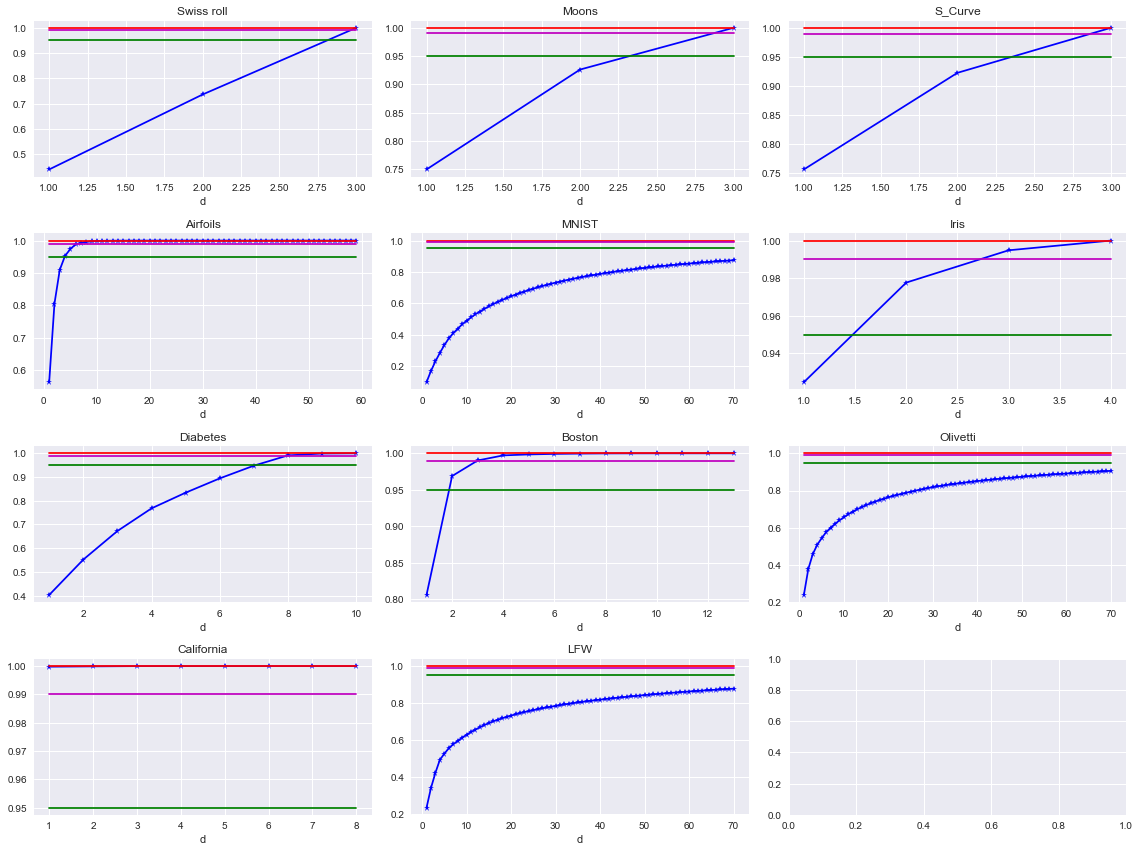

In [76]:
data_list = {"Swiss roll":swiss_roll_with_noise_data,
             "Moons":moons_with_noise_data,
             "S_Curve":s_curve_with_noise_data,
             "Airfoils":airfoils_data,
             "MNIST":mnist_data,
             "Iris":iris_data,
             "Diabetes":diabetes_data,
             "Boston":boston_data,
             "Olivetti":olivetti_data,
             "California":california_data,
             "LFW":lfw_data}

f, axarr = plt.subplots(4, 3, figsize=(16, 12))
i = 0
max_size = 70 # for more visuality
for elem in data_list:
    # dimensionality estimation
    sample_dim = data_list[elem].shape[1]
    if sample_dim > max_size:
        sample_dim = max_size
    dims = list(range(1, sample_dim + 1))
    lambdas = PCA_find_variances(data_list[elem])
    residual_vars = np.cumsum(lambdas) / np.sum(lambdas)
    residual_vars = residual_vars[:sample_dim]
    # plot dependence of residual variance from dimension
    axarr[i//3,i%3].plot(dims, residual_vars, '-*b')
    axarr[i//3,i%3].plot(dims, [1]*sample_dim, "r")
    axarr[i//3,i%3].plot(dims, [0.99]*sample_dim, "m")
    axarr[i//3,i%3].plot(dims, [0.95]*sample_dim, "g")
    axarr[i//3,i%3].set_title(elem)
    axarr[i//3,i%3].set_xlabel('d')
    i += 1
f.tight_layout()

# Сравнить результаты, сделать выводы

Presumably true intristic dimensionalities taken from given course project:
swiss, moons, curve - 2;
mnist - 13;
iris - 3;
diabetes - 6;
boston - 3;
olivetti - 7 to 12;
california - 4;

PCA can not determine intristic dimensionality if data forms complicated non-linear structures, such as, Swiss roll, Moons, S_curve, MNIST, Olivetti Faces and LFW. But this method has its own advantages like fast computational time and good results for certain datasets, for instance, Airfoils, Iris, Boston and spheres as well.
Levina-Bickel's method tends to underestimate spheres' dimensionality and errors grows as ID grows. But it shows a good result for non-linear datasets: swiss roll, moons, s_curve. Also, it is accurate at MNIST, Boston, Iris, Diabetes datasets. However, it strongly depends on the number of nearest neighbors, intristic dimensionality and sample's size.
Isomap shows exact dimension of the spheres and swiss roll, moons, curve. It is precise at mnist and iris either. But it shows questionable results at Boston, diabetes, Olivetti and LFW datasets because residual variances' plot doesn't have fractures.
G-C method is not purely precise at spheres (at small dims it underestimates ID, at larger dims it overestimates ID). It works well with moons and swiss roll. Other results in that particular case are unreliable, some are too high while others are too low. Besides, california dataset can not be computed due to large amount of RAM required.
To sum up, examined methods are good alternatives for traditional linear methods like PCA but L-B and G-C methods depend strongly on inner parameters and need to be tuned for every task separately. As for Isomap, it seems to be most universal. So, for best result, one needs to combine different methods and regard different possibilities by testing models with cross-validation supposing diffierent IDs.